In [1]:
%matplotlib widget
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
class spherical_harmonics:
    def __init__(self, grid_size=1000):
        theta = np.linspace(0, np.pi, grid_size)
        phi = np.linspace(0, 2*np.pi, grid_size)
        self.theta_grid, self.phi_grid= np.meshgrid(theta, phi)
        
        self.x_grid = np.sin(self.theta_grid) * np.cos(self.phi_grid)
        self.y_grid = np.sin(self.theta_grid) * np.sin(self.phi_grid)
        self.z_grid = np.cos(self.theta_grid)
        
    def N_lm(self, l, m):
        return np.sqrt( 2 * (l + 1) * math.factorial(l-m) / ( 2 * math.factorial(l+m) ) )
    
    def P_lm(self, theta, l, m): # Achtung, theta, nicht cos(theta) wie normalerweise definiert
        if l==0: return 1
        elif l==1:
            if m==0: return np.cos(theta)
            elif m==1: return -np.sin(theta)
            elif m==-1: return np.sin(theta)/2
        elif l==2:
            if m==0: return (3*np.cos(theta)**2-1) / 2
            elif m==1: return -3*np.sin(theta)*np.cos(theta)
            elif m==-1: return np.sin(theta)*np.cos(theta) / 2
            elif m==2: return 3*np.sin(theta)**2
            elif m==-2: return np.sin(theta)**2 / 8
    
    def Y_lm(self, theta, phi, l, m):
        Y_lm = 1/np.sqrt(2 * np.pi) * self.N_lm(l, m) * self.P_lm(theta, l, m) * np.exp(1.0j * m * phi)
        return Y_lm
    
    def plot_shape(self, l, m): # Fehlt noch: farbe je nach Vorzeichen
        spherical_shape = np.abs(np.real(self.Y_lm(self.theta_grid, self.phi_grid, l, m)))
        x_shape = self.x_grid * spherical_shape
        y_shape = self.y_grid * spherical_shape
        z_shape = self.z_grid * spherical_shape
        
        fig = plt.figure(figsize = (10,8))
        ax = plt.axes(projection='3d')
        ax.plot_surface(x_shape, y_shape, z_shape)
        ax.set_aspect('equal')
        plt.show()
        
    def plot_unit_sphere(self, l, m):
        spherical_shape = np.real(self.Y_lm(self.theta_grid, self.phi_grid, l, m))
        colormap_class = plt.cm.ScalarMappable(cmap='viridis')
        spherical_colors = colormap_class.to_rgba(spherical_shape)
        
        print(spherical_shape.min(),' ', spherical_shape.max())
        
        fig = plt.figure(figsize = (10,8))
        ax = plt.axes(projection='3d')
        pic = ax.plot_surface(self.x_grid, self.y_grid, self.z_grid,facecolors=spherical_colors, cmap='viridis')
        ax.set_aspect('equal')
        fig.colorbar(colormap_class, ax=ax)
        plt.show()
        
    def plot(self, l, m):
        spherical_shape = np.real(self.Y_lm(self.theta_grid, self.phi_grid, l, m))
        x_shape = self.x_grid * np.abs(spherical_shape)
        y_shape = self.y_grid * np.abs(spherical_shape)
        z_shape = self.z_grid * np.abs(spherical_shape)
        
        fig = plt.figure(figsize = (10,4))
        
        ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax_1.plot_surface(x_shape, y_shape, z_shape)
        ax_1.set_aspect('equal')
        
        colormap_class = plt.cm.ScalarMappable(cmap='viridis')
        spherical_colors = colormap_class.to_rgba(spherical_shape)
        
        ax_2 = fig.add_subplot(1, 2, 2, projection='3d')
        ax_2.plot_surface(self.x_grid, self.y_grid, self.z_grid,facecolors=spherical_colors, cmap='viridis')
        ax_2.set_aspect('equal')
        fig.colorbar(colormap_class, ax=ax_2, shrink=0.6)
        

In [3]:
wasser = spherical_harmonics()

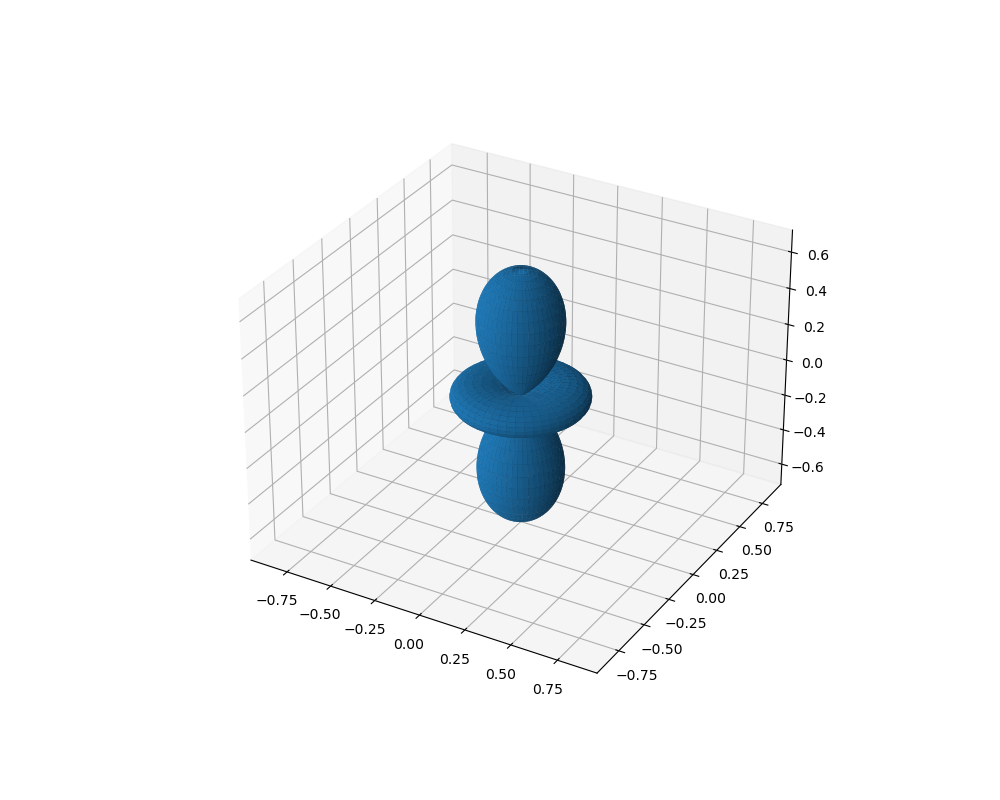

In [6]:
wasser.plot_shape(2,0)

-0.3454915869329953   0.690988298942671


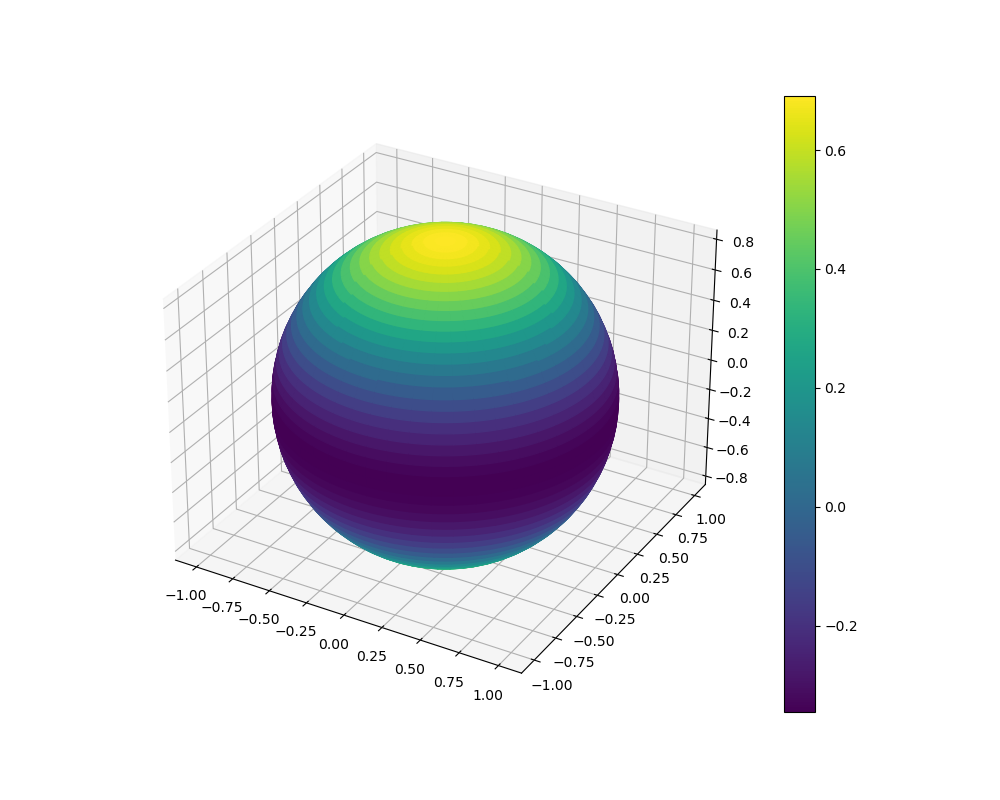

In [7]:
wasser.plot_unit_sphere(2,0)

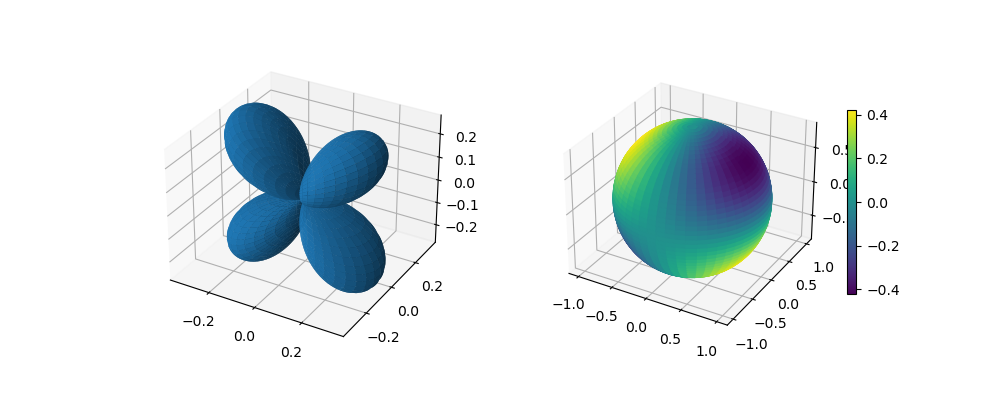

In [8]:
wasser.plot(2,1)